# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Technical Approach

    1. Read the Data
    2. Perform EDA
        2.1 Clean the Data
        2.2 Remove Nulls
        2.3 Remove Outliers
    3. Modeling
        3.1 Creating dummies
        3.2 Scaling of variables
        3.3 Creating Model
        3.4 Repeat and validate
        3.5 Test the model on Test Data and Predictions
 

# 1. Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

sns.set()
%config InlineBackend.figure_format='retina'

# 2. Reading the Data and Performing EDA

## 2.1 Let's Read the Data

In [2]:
df = pd.read_csv('./Leads.csv')
df.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Shape of the dataframe 
df.shape

(9240, 37)

In [4]:
#Info of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking null values in the data
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#Checking the Null percentage value
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
#describe the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Insights**

1. We can see that there are some columns with more than 30% of null values. 



## 2.1 Cleaning of Data

Let's clean the data and prepare for analysis.




In [8]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,88a022f6-5541-44a5-bd24-93704ed19295,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [9]:
print(df.Country.unique())

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']


In [10]:
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

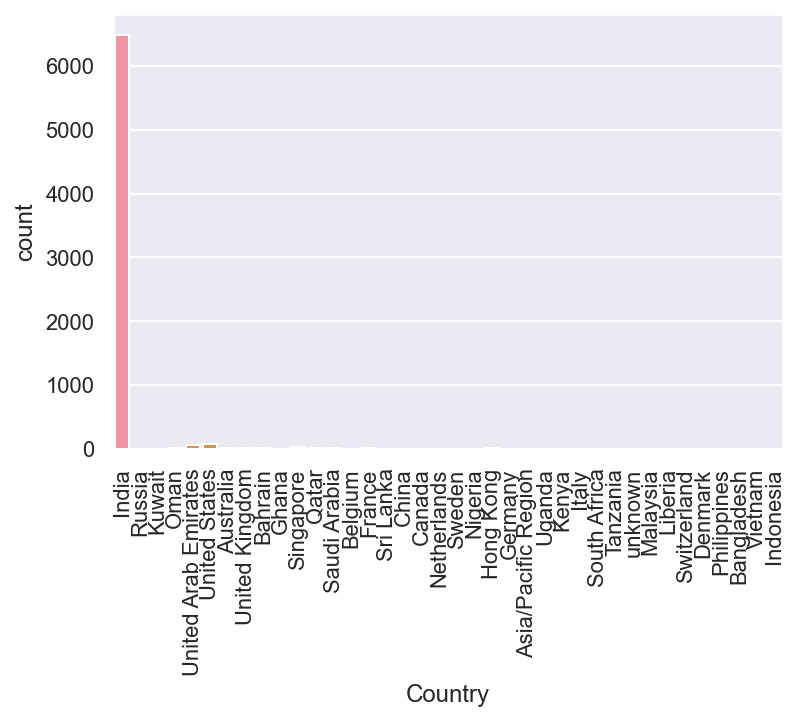

In [11]:
sns.countplot(df.Country)
xticks(rotation = 90)

In [12]:
#Let's remove Country as more than 6000 are India only
# dropping country column as it is not having more variance
df=df.drop('Country',axis=1)

**Let's see the same for other columns**

In [13]:
#City

df.City.describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

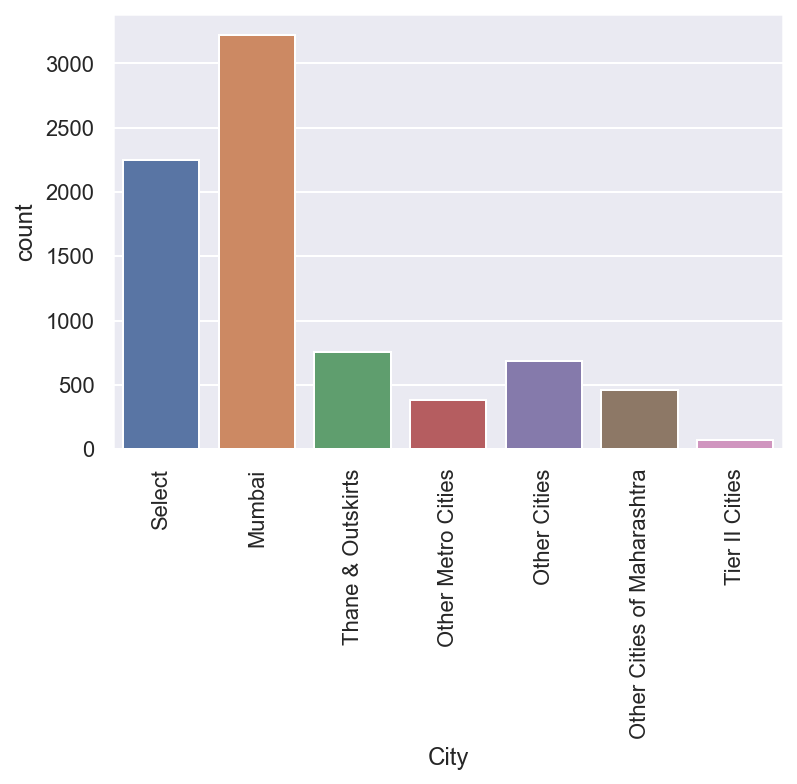

In [14]:
sns.countplot(df.City)
xticks(rotation = 90)

In [15]:
#Most of the values are either 'Mumbai' or 'Select'
# We can remve city as well.

df=df.drop('City',axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

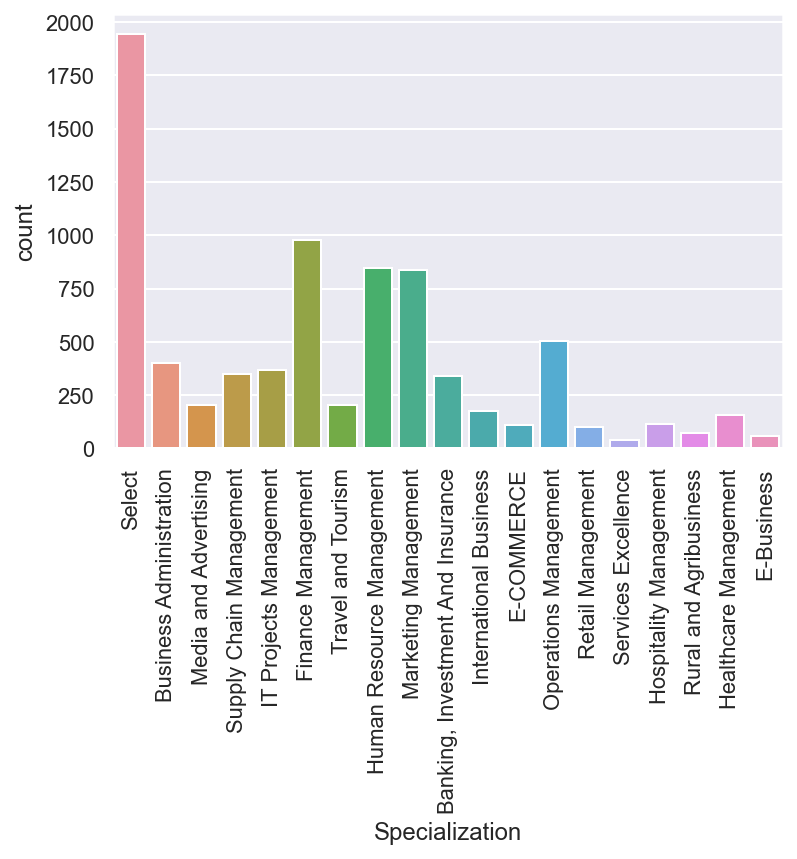

In [16]:
## Specialization

sns.countplot(df['Specialization'])
xticks(rotation = 90)

In [17]:
## Specialization has almost 1750 select values and apart from this 15% null values
## What we can do about this create a category of others for Students or misc.

df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
df['Specialization'] = df['Specialization'].replace("Select", "Others")

In [18]:
#Lead Number
# It is a unique id, not useful. Can be dropped
df = df.drop('Lead Number',axis=1)

*Let's see the null percengtage again.*

In [19]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

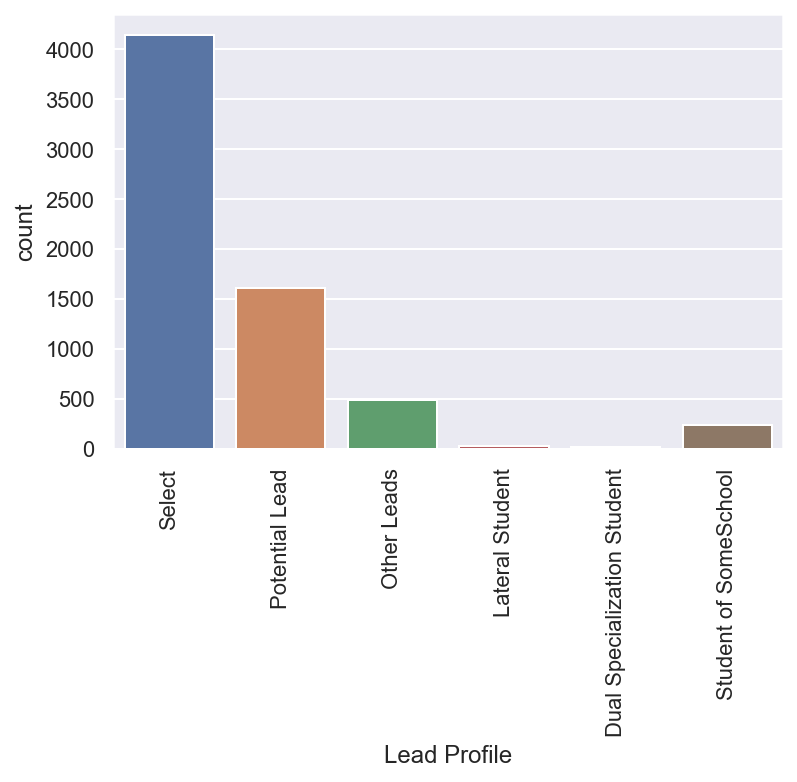

In [20]:
#Lead Profile
sns.countplot(df['Lead Profile'])
xticks(rotation = 90)

In [21]:
# Lead Profile already has 4000 select values and then 29% null values which makes this column useless, so its safe to drop it

df = df.drop('Lead Profile',axis=1)

In [22]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

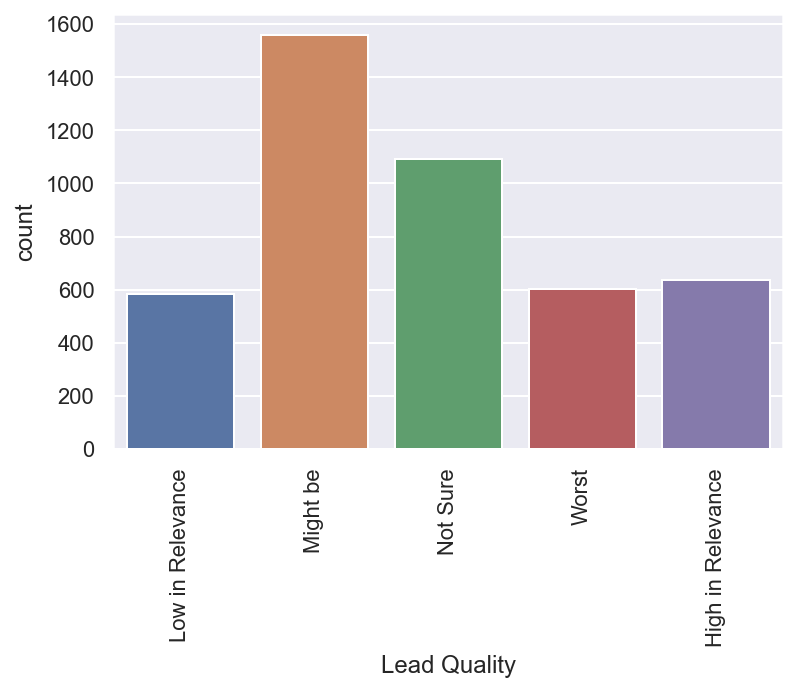

In [23]:

#Lead Quality
sns.countplot(df['Lead Quality'])
xticks(rotation = 90)

In [24]:
# Lead Quality seems an important parameter as per the business
# so instead of dropping this we can impute the values to  Not Sure' 
#since whoever was filling the form did not mention explicitly

df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

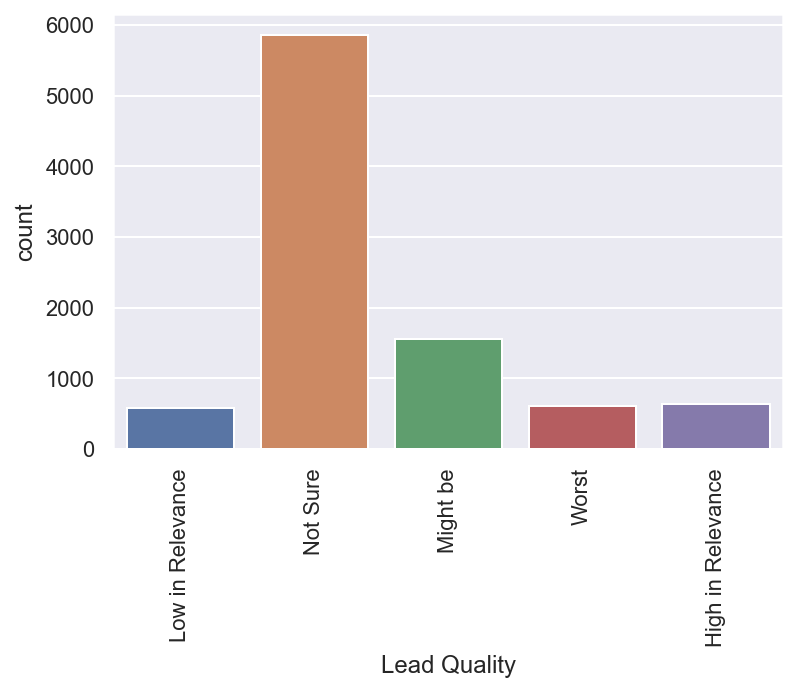

In [25]:

#Lead Quality
sns.countplot(df['Lead Quality'])
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

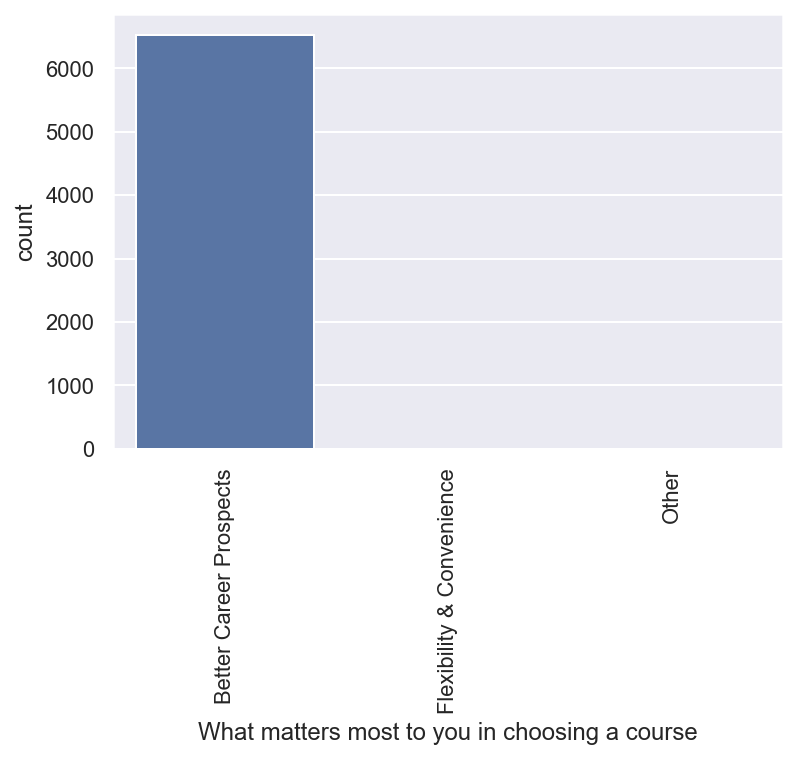

In [26]:
#What matters most to you in choosing a course

sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [27]:
# Since majority data (more than 80% is for Better Career Prospect, 
#if we impute this then it will be more than 90%) so it is safe to drop this column

df = df.drop('What matters most to you in choosing a course', axis=1)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

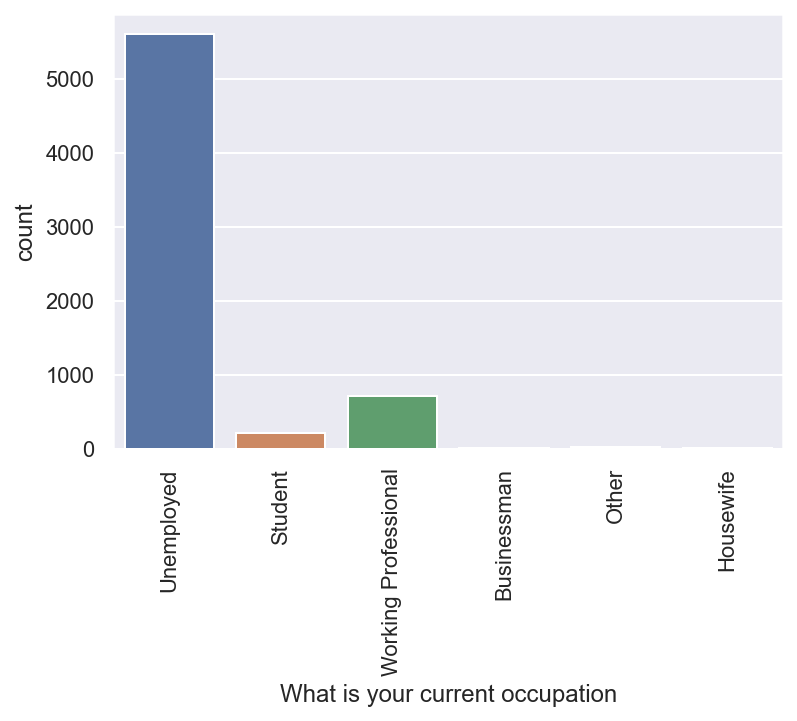

In [28]:
##What is your current occupation
sns.countplot(df['What is your current occupation'])
xticks(rotation = 90)

In [29]:
## Most of the values are unemployed so null values can be imputed as unemployed

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

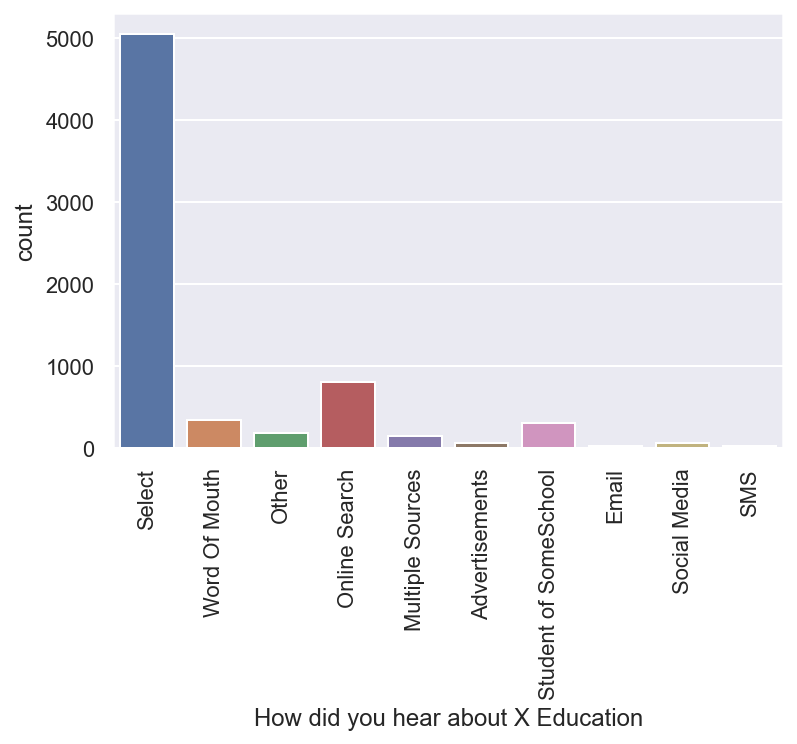

In [30]:
sns.countplot(df['How did you hear about X Education'])
xticks(rotation = 90)

In [31]:
## Column "How did you hear about X Education" column can be dropped 
## as most of the values are select and 23% are null values apart from select

df = df.drop('How did you hear about X Education',axis=1)

In [32]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

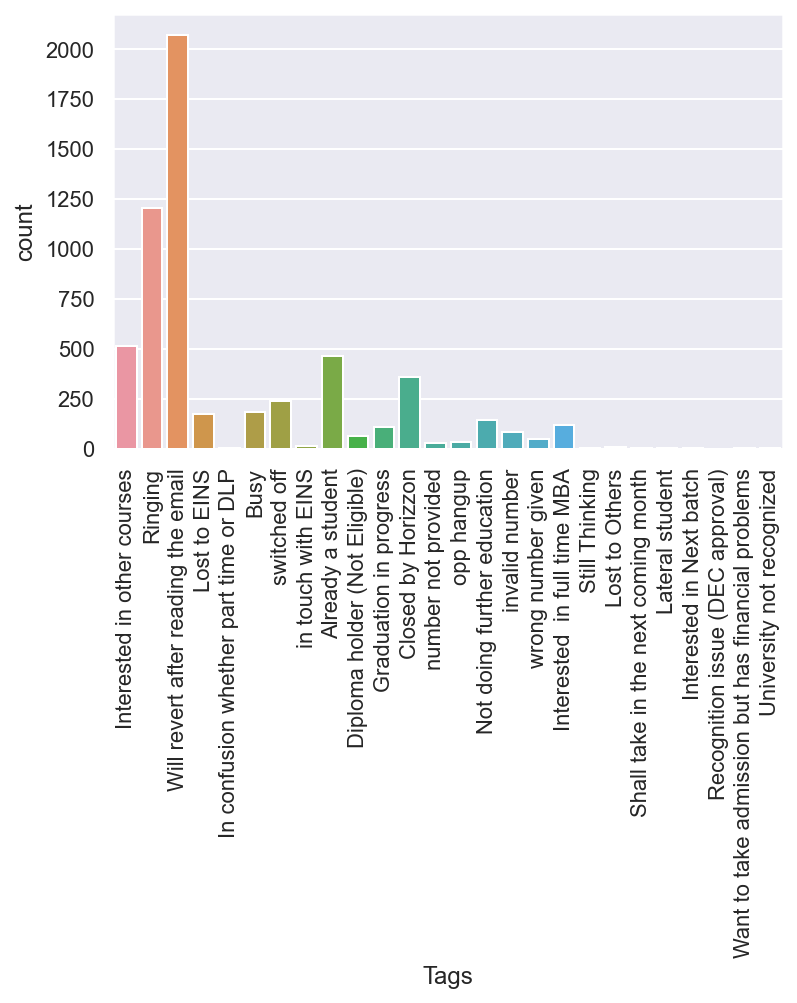

In [33]:
#tags 
sns.countplot(df['Tags'])
xticks(rotation = 90)

In [34]:
# Since most frequent option is Will Revert after reading the email, we can impute the mode in this case:

df['Tags'] = df['Tags'].fillna(df['Tags'].mode()[0])

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

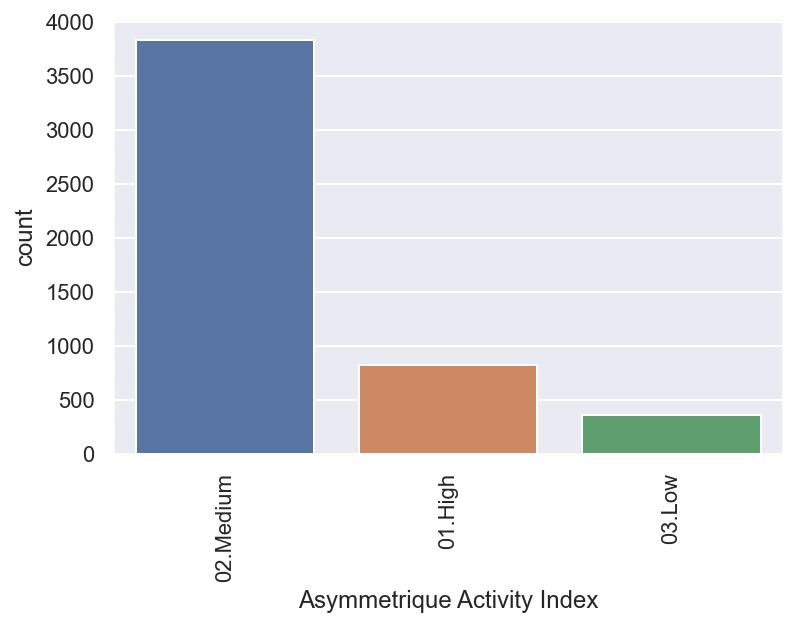

In [35]:
#Asymmetrique Activity Index
sns.countplot(df['Asymmetrique Activity Index'])
xticks(rotation = 90)

In [36]:
# For this column we can impute the null values to Medium

df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].fillna(df['Asymmetrique Activity Index'].mode()[0])

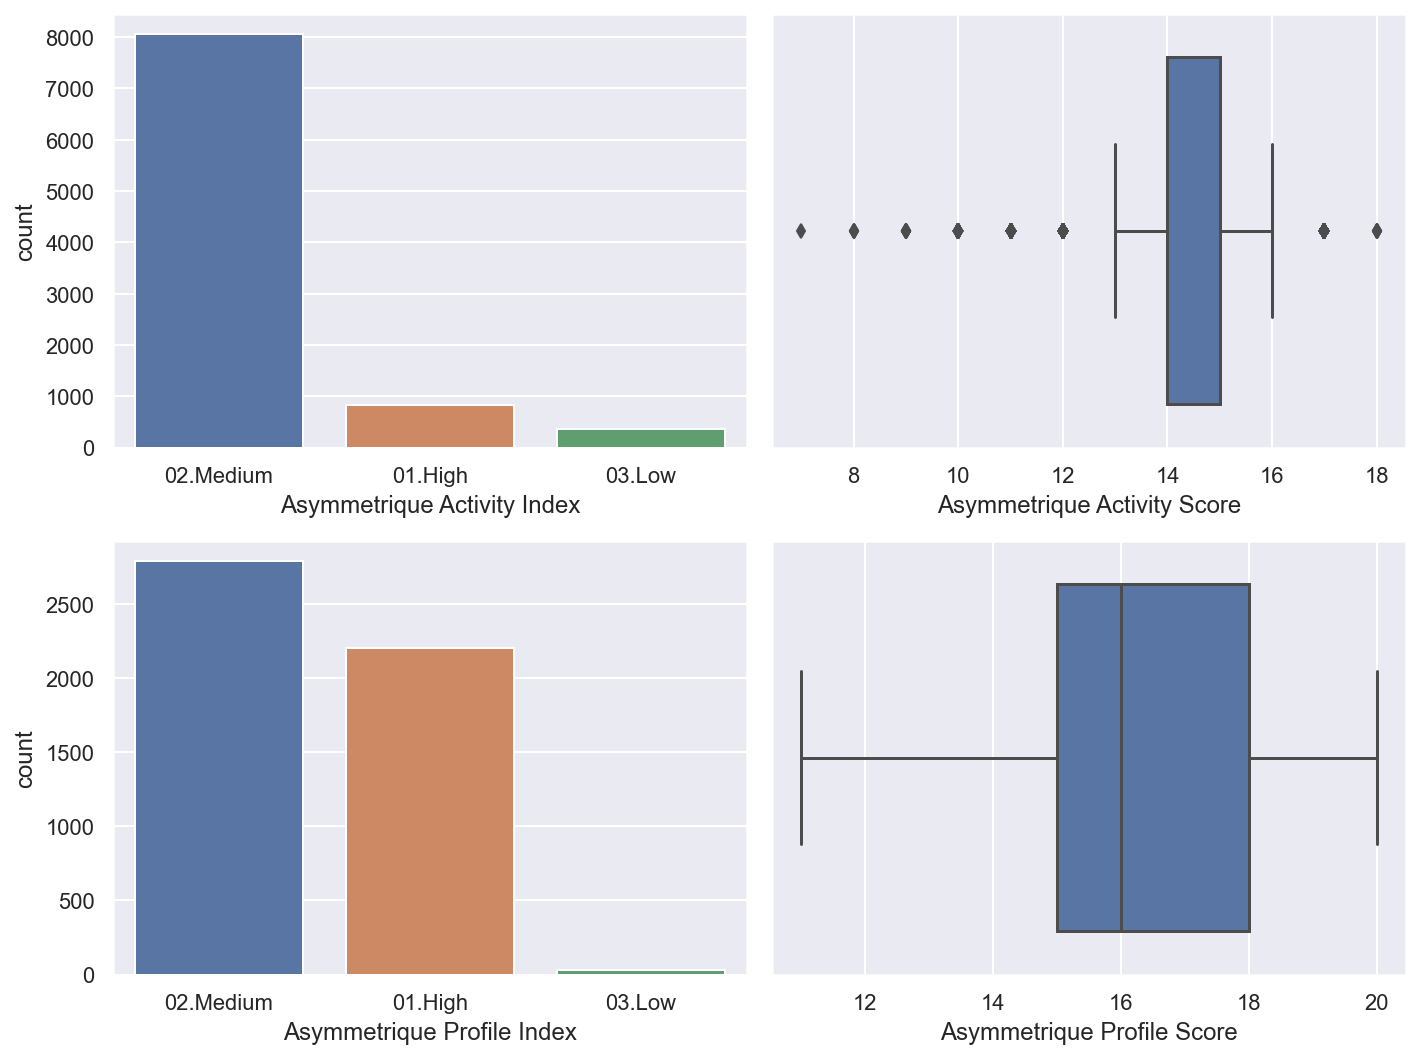

In [37]:
#Lets plot for the Asymmetrique cloumns , they are and measure of An index and score assigned to each customer based on their activity and their profile
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [38]:
#based on the above graphs there is too much variation , so not recommended to impute hence lets drop the columns
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [39]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [40]:
## For Lead Source, Last Activity, Page Views per Visit, Total visits we can drop 
##those rows which contain null values since the number of missing values is less

df = df.dropna()

In [41]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

**Insights**

We have removed all the null values and the columns which were not relavant or the data was not enough for analysis.

In [42]:
df.shape

(9074, 27)

## 2.2 EDA

### 2.2.1 Univariate Analysis

#### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

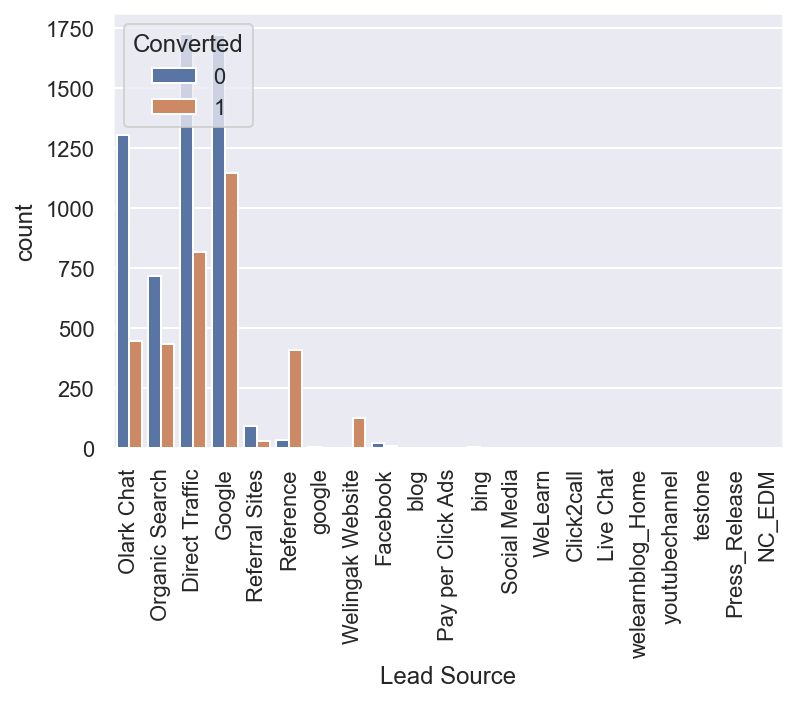

In [43]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

In [44]:
## We can club the values which do not have a considerable impact on Lead Source

df['Lead Source'] = df['Lead Source'].replace(['Pay per Click Ads','bing','blog','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home',
                                               'youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

df.loc[(df['Lead Source'] == 'google'),'Lead Source'] = 'Google'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

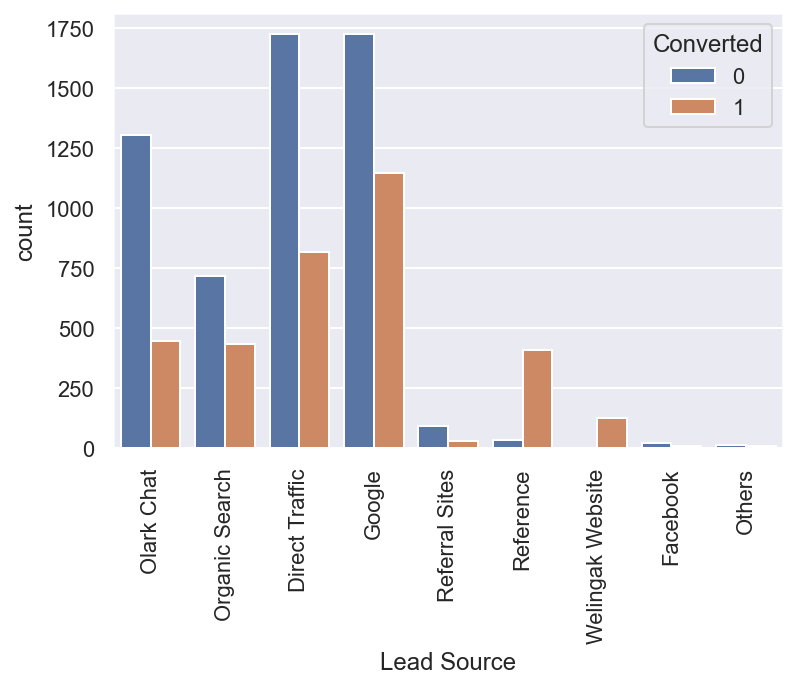

In [45]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

#### Insights
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

__To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__

#### Lead Origin 

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

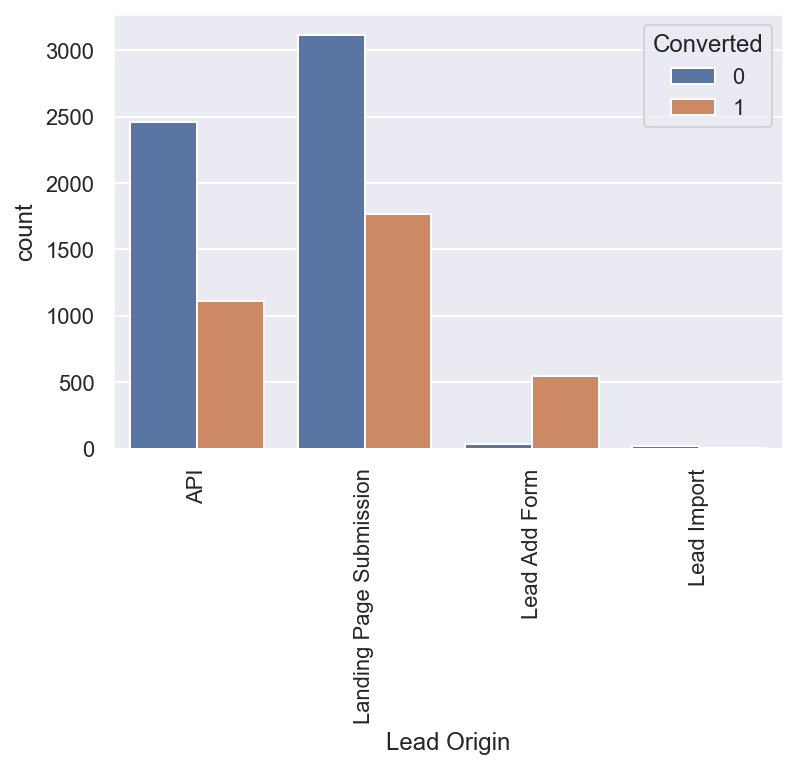

In [46]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)

#### Insight
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.


**We will have to focus more on improving lead conversion of API and Landing page Submission origin.**


In [47]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Let's see if we can analyze all the columns at once**

In [48]:
for col in df.columns:
    print("\n")
    print("---------------"+col+"-----------------")
    print(df[col].value_counts())
    print("----------------------------------------")



---------------Prospect ID-----------------
88a022f6-5541-44a5-bd24-93704ed19295    1
81421e3f-04f8-4c6e-a64f-2950883e0630    1
e00542c5-457c-43b8-962d-aa8b4e7f97f1    1
be315a3d-77d8-444a-ac9a-939535e98c6c    1
7c3f0ae6-bd4b-40bb-9634-d9f615db32fb    1
                                       ..
b8432324-ce6b-4b4f-b21d-8a2d4a3cca88    1
348726a4-4a3e-4ca3-a0f0-051fcc6b1d80    1
508b7260-b5cd-4c55-968b-3532a461c539    1
5884aaa1-7716-4051-858b-600267e2512b    1
cd6bf86f-0fb0-486c-8e82-dcc3c1e2c431    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------


---------------Lead Origin-----------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
----------------------------------------


---------------Lead Source-----------------
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference   

**Insights**

---------------------------------------------------------------------------------
    1. We can see that below columns do not have enough variations in the data. 
        - I agree to pay the amount through cheque
        - Get updates on DM Content
        - Update me on Supply Chain Content
        - Receive More Updates About Our Courses
        - Through Recommendations
        - Digital Advertisement
        - Newspaper
        - X Education Forums
        - Newspaper Article
        - Magazine
        - Do Not Call
        - Search

    2. These columns either have 0% change or less than 3% change altogether. 
    3. We can drop these columns from the dataset. 

---------------------------------------------------------------------------------


In [49]:
#Dropping the above columns from dataset.
#We will save this in a new dataframe to keep the original dataframe for later use if required.
df_reduced = df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Do Not Call','Search'], axis = 1)


In [50]:
#Reduced columns 
df_reduced.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

**Lets plot boxplot for all the integer columns**

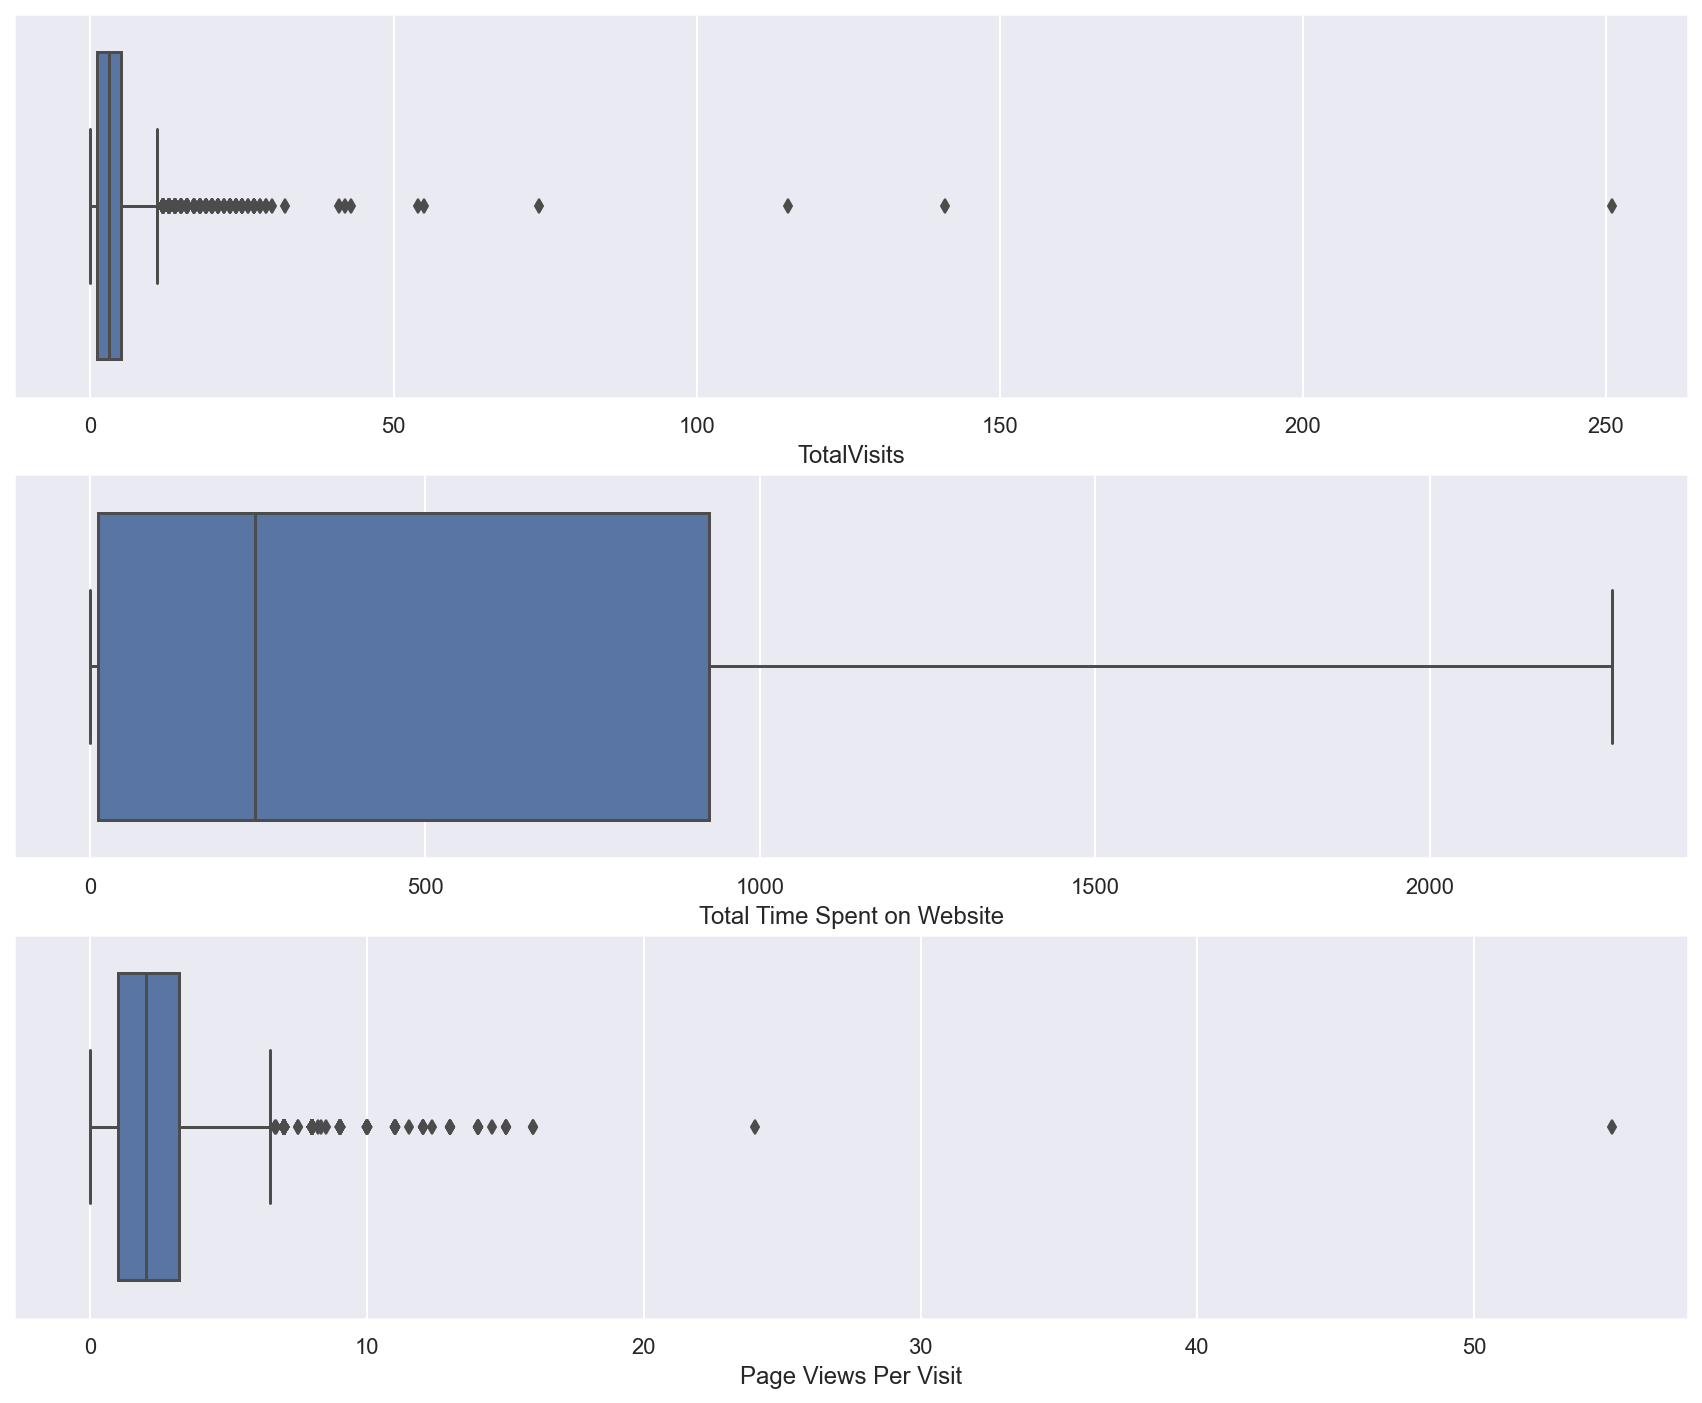

In [52]:
# Cheking the outliers - how values in each columns are distrivuted using boxplot
fig, axs = plt.subplots(3, figsize = (15,12))

plt1  = sns.boxplot(df_reduced['TotalVisits'],                              ax = axs[0])
plt2  = sns.boxplot(df_reduced['Total Time Spent on Website'],              ax = axs[1])
plt3  = sns.boxplot(df_reduced['Page Views Per Visit'],                     ax = axs[2])
plt.show()


 **Insights**
    
1. We can see some outliers in the data for total visits and page views per visit.
2. We will perform outlier treatments.


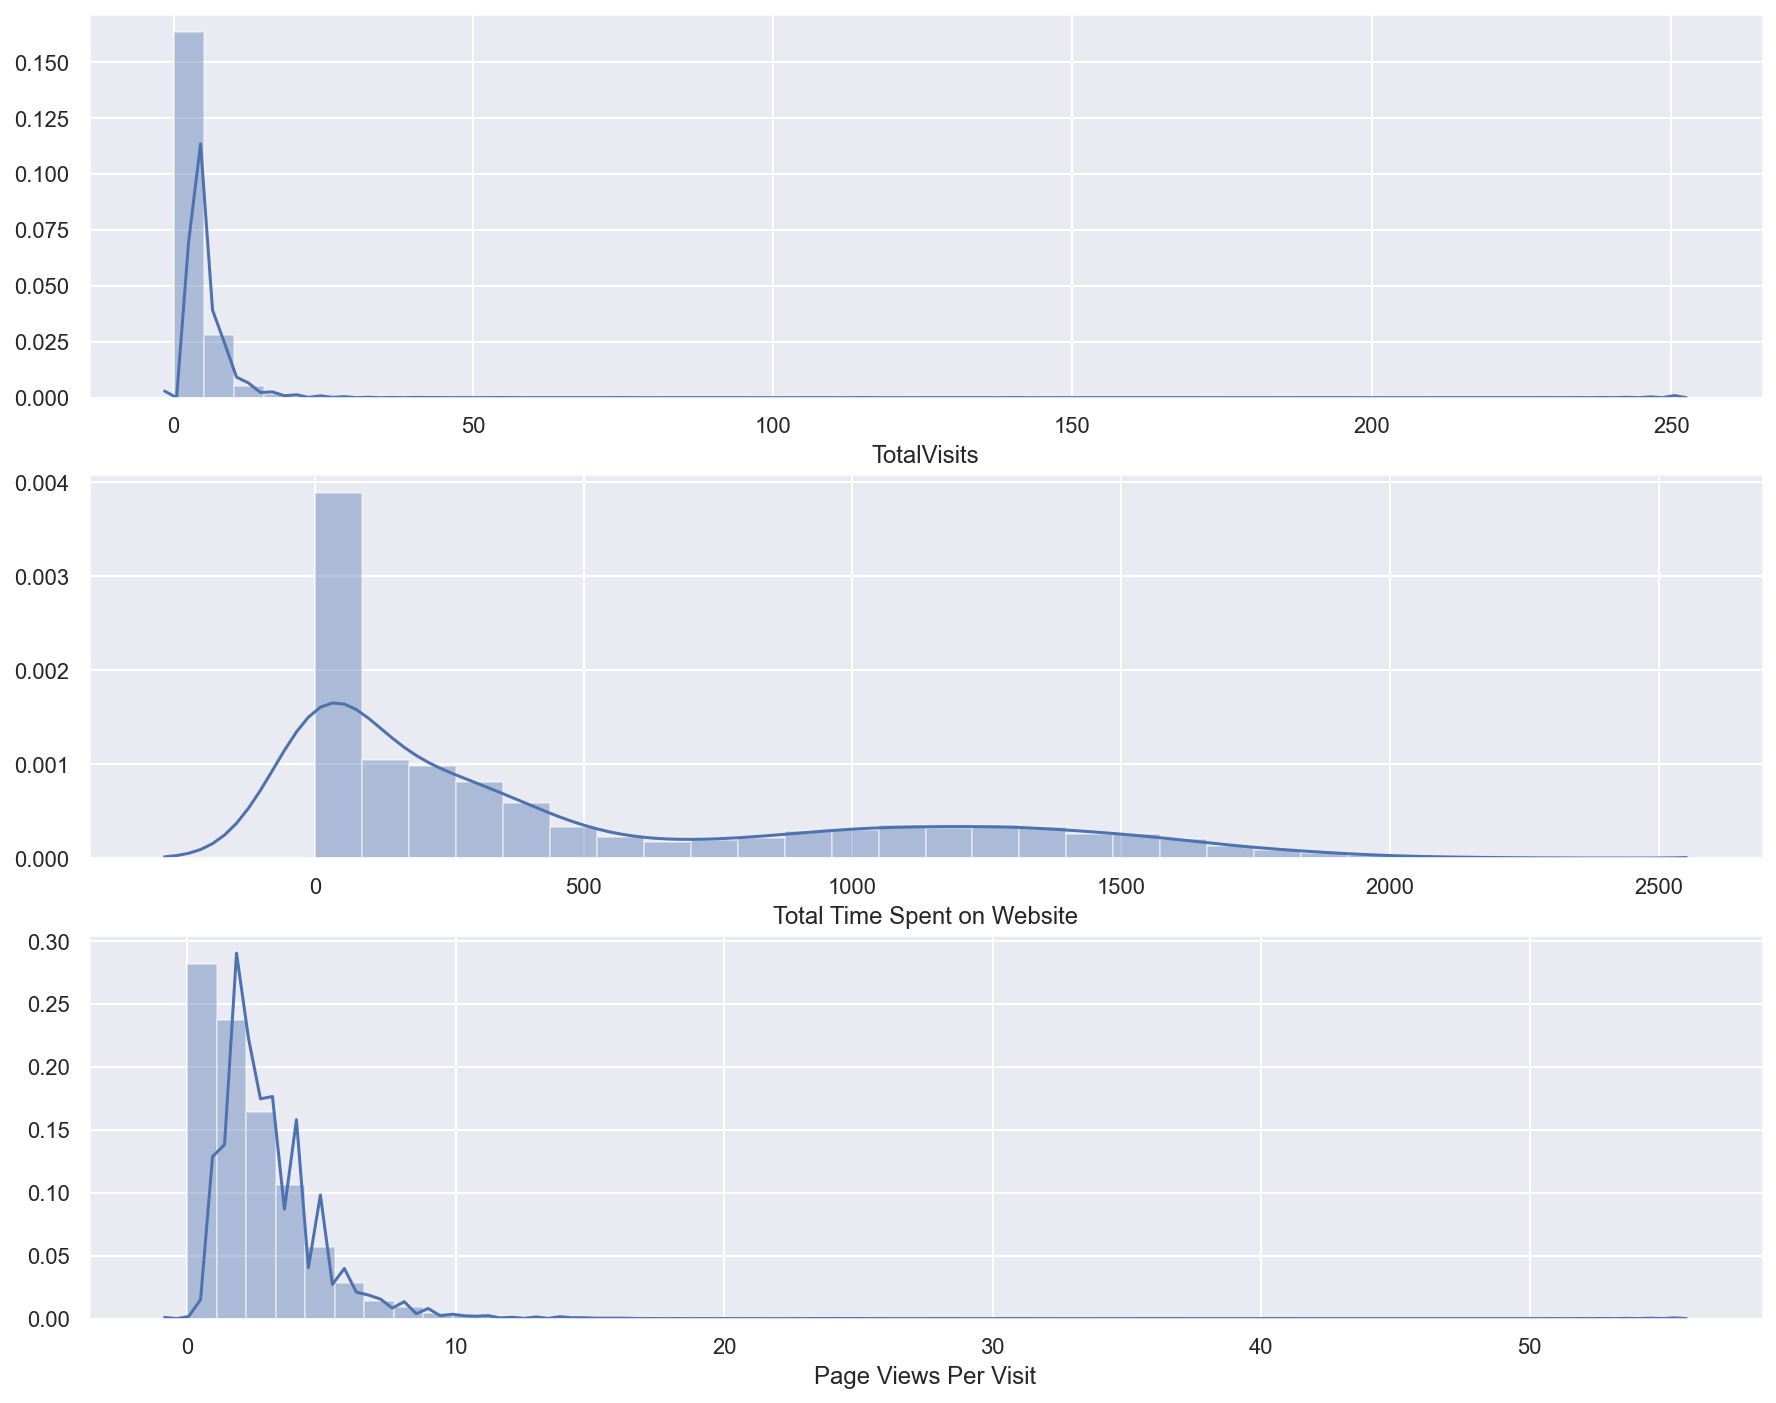

In [53]:
#Distribution of data

fig, axs = plt.subplots(3, figsize = (15,12))

plt1  = sns.distplot(df_reduced['TotalVisits'],                              ax = axs[0])
plt2  = sns.distplot(df_reduced['Total Time Spent on Website'],              ax = axs[1])
plt3  = sns.distplot(df_reduced['Page Views Per Visit'],                     ax = axs[2])
plt.show()

#### 2.2.2 Bi-variate analysis


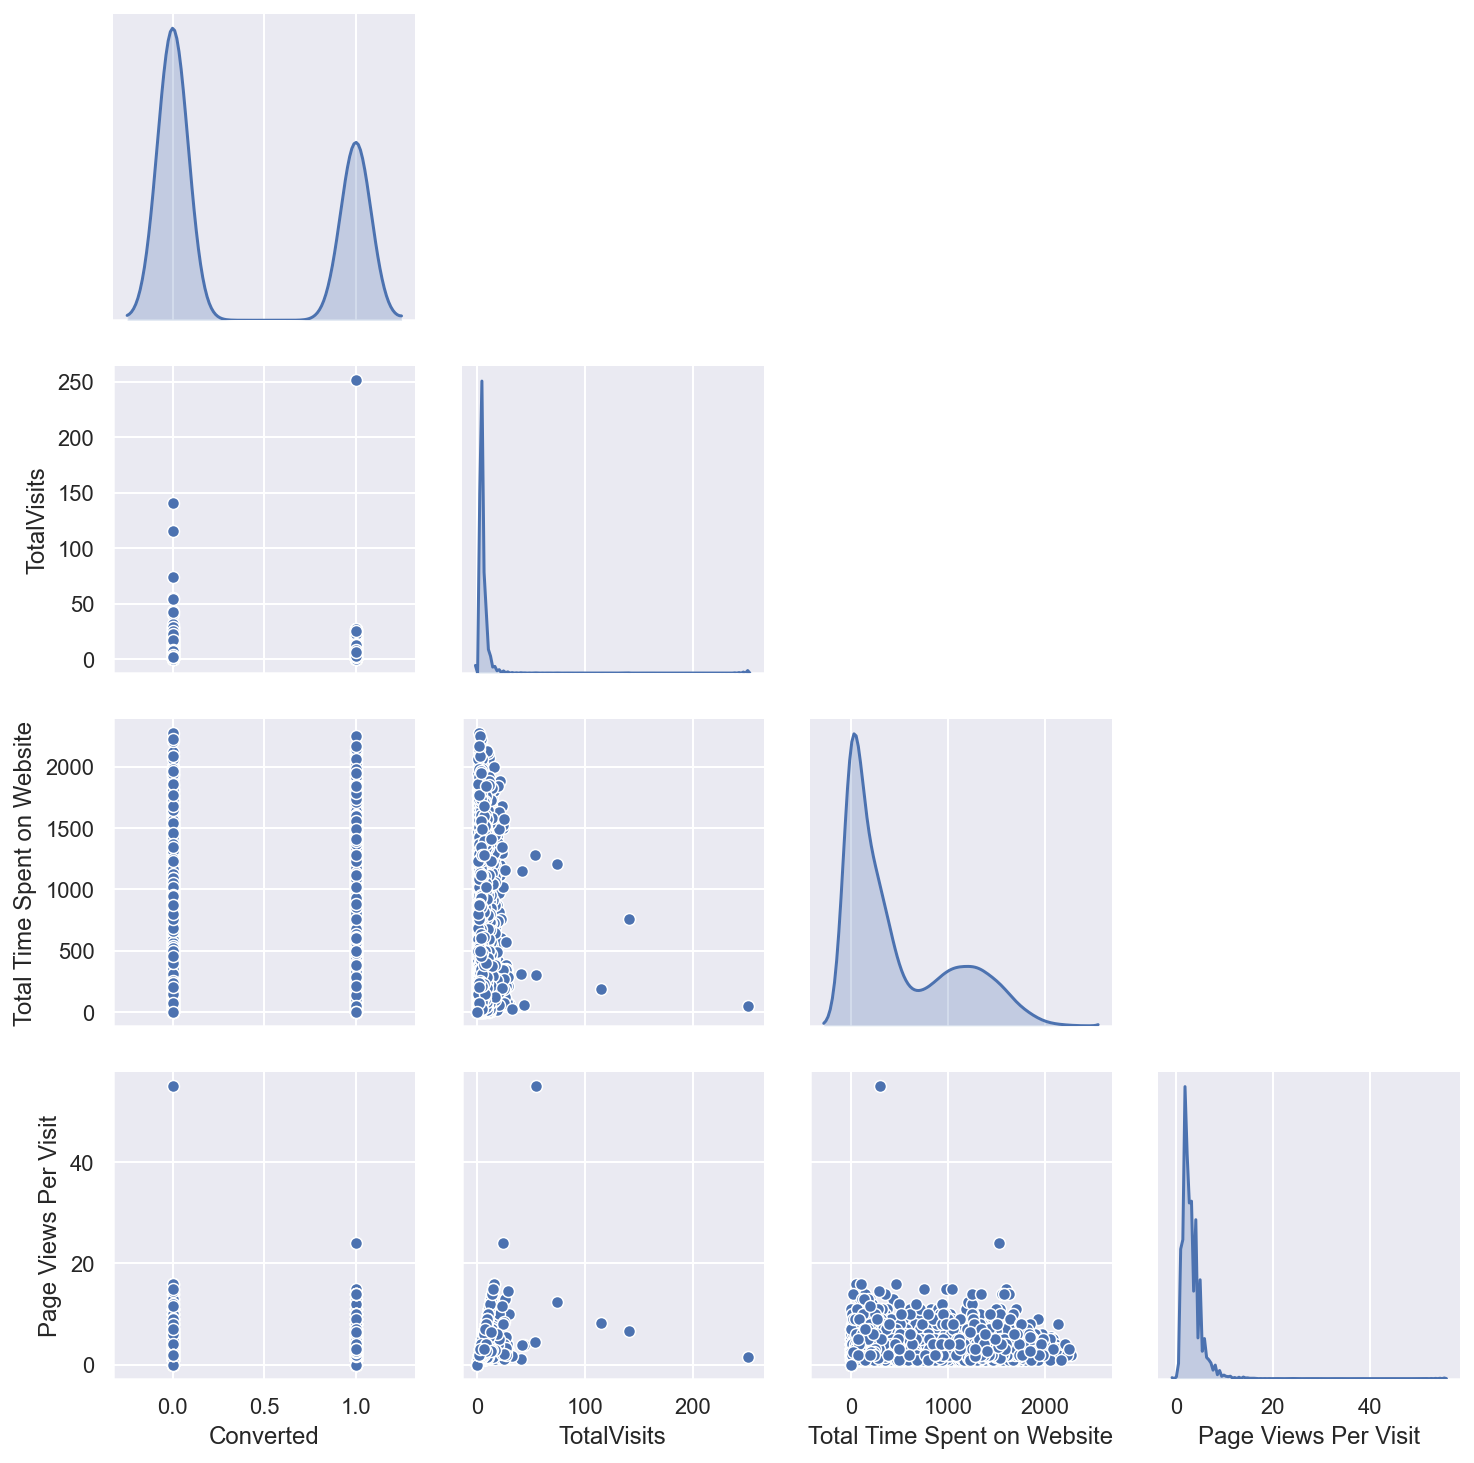

In [54]:
# pairplot for continuous data type
sns.pairplot(df.select_dtypes(['int64','float64']), diag_kind='kde', corner=True)
plt.show()

`We can see the that the data is not normally distributed but skewed. `

In [55]:
df_reduced[['TotalVisits','Page Views Per Visit']].describe(percentiles= [0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.370151
std,4.858802,2.160871
min,0.000000,0.000000
1%,0.000000,0.000000
5%,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
95%,10.000000,6.000000


In [56]:
#Cap the data between till 0.95 percentile

percentiles = df_reduced['TotalVisits'].quantile([0.00,0.95]).values
df_reduced['TotalVisits'][df_reduced['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_reduced['TotalVisits'][df_reduced['TotalVisits'] >= percentiles[1]] = percentiles[1]


In [57]:
#Cap the data between till 0.95 percentile
percentiles = df_reduced['Page Views Per Visit'].quantile([0.00,0.95]).values
df_reduced['Page Views Per Visit'][df_reduced['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_reduced['Page Views Per Visit'][df_reduced['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

**Dummy Variable Creation**

In [58]:
df_reduced.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
columns_to_dummy_original = df_reduced.select_dtypes(include='object').columns

columns_to_dummy = list(columns_to_dummy_original)
columns_to_dummy.remove('Prospect ID')
columns_to_dummy

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_df = pd.get_dummies(df_reduced[columns_to_dummy], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
# Adding the results to the original dataset
df_final = pd.concat([df_reduced, dummy_df], axis=1)
df_final.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [62]:
##Dropping the original columns

columns_to_dummy_original

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [63]:
df_final = df_final.drop(columns_to_dummy_original,axis=1)

In [64]:
df_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


Now that we have performed the pre-processing, we will do the split of the data in Test and Train dataset and start working on the model.


## 3. Logistic Regression Modeling

### 3.1 Test Train Split

Let's perform the split of the data in to Test and Train Data set.

In [65]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X

X = df_final.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
y = df_reduced['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3.2 Feature Scaling

In [68]:
#We will perform scaling of 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()

cols_to_scale = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.2,0.178347,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.2,0.085355,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.0,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.2,0.619946,0.333333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.5,0.711590,0.416667,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
#Let's check the conversion rate.

### lead conversion Rate
lead_conversion = (sum(df_reduced['Converted'])/len(df_reduced['Converted'].index))*100
lead_conversion

37.85541106458012

We have 37.8% conversion rate.

### 3.3 Model Building

#### 3.3.1 First basic model

In [70]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           97
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Jan 2021   Deviance:                          nan
Time:                        12:33:58   Pearson chi2:                 3.08e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3.228e+15   7.34e+07    4.4e+07      0.000    3.23e+15    3.23e+15
TotalVisits                                              1.63e+14   5.19e+06   3.14e+07      0.000    1.63e+14    1.63e+14
Total Time Spent on Website                             1.169e+15   4.19e+06   2.79e+08      0.000    1.17e+15    1.17e+15
Page Views Per Visit                                   -3.451e+14   5.29e+06  -6.53e+07      0.000   -3.45e+14   -3.45e+14
Lead Origin_Landing Page Submission                    -3.042e+14    3.4e+06  -8.95e+07      0.000   -3.04e+14   -3.04e+14
Lead Origin_Lead Add Form                              -8.579e+14    2.9e+07  -2.96e+07      0.000   -8.58e+14   -8.58e+14
Lead Origin_Lead Import                                 6.451e+15   6.93e+07   9.31e+07      0.000    6.45e+15    6.45e+15
Lead Source_Facebook                                   -5.761e+15   6.78e+07   -8.5e+07      0.000   -5.76e+15   -5.76e+15
Lead Source_Google                                      5.156e+13   2.84e+06   1.82e+07      0.000    5.16e+13    5.16e+13
Lead Source_Olark Chat                                  3.526e+14   4.07e+06   8.66e+07      0.000    3.53e+14    3.53e+14
Lead Source_Organic Search                               9.58e+13   3.25e+06   2.95e+07      0.000    9.58e+13    9.58e+13
Lead Source_Others                                      7.492e+14   1.86e+07   4.04e+07      0.000    7.49e+14    7.49e+14
Lead Source_Reference                                   1.037e+15   2.93e+07   3.54e+07      0.000    1.04e+15    1.04e+15
Lead Source_Referral Sites                             -1.037e+13   7.89e+06  -1.31e+06      0.000   -1.04e+13   -1.04e+13
Lead Source_Welingak Website                            1.478e+15   2.98e+07   4.95e+07      0.000    1.48e+15    1.48e+15
Do Not Email_Yes                                        -2.55e+14   4.46e+06  -5.71e+07      0.000   -2.55e+14   -2.55e+14
Last Activity_Converted to Lead                        -3.067e+15   3.43e+07  -8.95e+07      0.000   -3.07e+15   -3.07e+15
Last Activity_Email Bounced                            -3.056e+15   3.46e+07  -8.82e+07      0.000   -3.06e+15   -3.06e+15
Last Activity_Email Link Clicked                        -2.75e+15    3.5e+07  -7.85e+07      0.000   -2.75e+15   -2.75e+15
Last Activity_Email Marked Spam                        -2.184e+13   4.13e+07  -5.29e+05      0.000   -2.18e+13   -2.18e+13
Last Activity_Email Opened                             -3.099e+15   3.41e+07  -9.09e+07      0.000    -3.1e+15    -3.1e+15
Last Activity_Email Received                            7.207e+14   7.54e+07   9.56e+06      0.000    7.21e+14    7.21e+14
Last Act

#### 3.3.2 Feature Selection Using RFE

In [71]:
logreg = LogisticRegression()

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 75),
 ('Lead Source_Olark Chat', False, 24),
 ('Lead Source_Organic Search', False, 65),
 ('Lead Source_Others', False, 72),
 ('Lead Source_Reference', False, 66),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 41),
 ('Last Activity_Email Bounced', False, 42),
 ('Last Activity_Email Link Clicked', False, 69),
 ('Last Activity_Email Marked Spam', False, 55),
 ('Last Activity_Email Opened', False, 49),
 ('Last Activity_Email Received', False, 76),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Had a Phone Conversation', False, 13),
 ('Last

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [76]:
##Function for reusing - Pass X_train, y_train, list of columns
# Function Utility

def logistic_model(X_train, y_train, col):
    X_train_sm = sm.add_constant(X_train[col])
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = log_model.fit()
    return res,X_train_sm


def find_vif(X_train,y_train, col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


def model_accuracy_and_metrics(result, X_train_sm, probability ):
    # Getting the predicted values on the train set
    y_train_pred = result.predict(X_train_sm)
    print("\n---------------------------------------------------------------------")
    print("Predicted values on the train set - y_train_pred : -\n")
    print(y_train_pred[:5])
    
    y_train_pred = y_train_pred.values.reshape(-1)
    print("\n---------------------------------------------------------------------")
    print("Predicted values on the train set after reshaping - y_train_pred : -\n")
    print(y_train_pred[:5])
    
    ## Assigning to column names
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Prospect ID'] = y_train.index
    print("\n---------------------------------------------------------------------")
    print("Column created as converted and converted probability : -\n")
    print(y_train_pred_final.head())
    
    # Creating a column "predicted" will be 1 if prob is > than 0.5
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > probability else 0)
 
    # Let's see the head
    print("\n---------------------------------------------------------------------")
    print("Creating a column predicted will be 1 if prob is > than "+str(probability)+" : -\n")
    print(y_train_pred_final.head())
    
    # Confusion matrix 
    print("\n---------------------------------------------------------------------")
    print("Confusion Matrix : -\n")
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)
    
    
    # Overall Accuracy
    print("\n---------------------------------------------------------------------")
    print("Overall Accuracy of the Model: -",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
   
    
    #Sensitivity
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 
    
    print("\n---------------------------------------------------------------------")
    print("Sensitivity of the Model: -",TP / float(TP+FN))
        
    # Specificity
    print("\n---------------------------------------------------------------------")
    print("Specificity of the Model: -",TN / float(TN+FP))
        
    # Specificity
    print("\n---------------------------------------------------------------------")
    print("False Positive rate of the Model: -",FP/ float(TN+FP))
    
    # Positive Predictive Value
    print("\n---------------------------------------------------------------------")
    print("Positive Predictive Value of the Model: -",TP / float(TP+FP))
    
    # Negative predictive value
    
    print("\n---------------------------------------------------------------------")
    print("Negative predictive value of the Model: -",TN / float(TN+ FN))
    
    print("\n---------------------------------------------------------------------")
    
    return y_train_pred_final

In [77]:
## Model with 'col'

result,X_train_sm = logistic_model(X_train, y_train, col)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.3
Date:                Mon, 11 Jan 2021   Deviance:                       2814.5
Time:                        12:34:05   Pearson chi2:                 2.35e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6713      0.229    -11.677      0.000      -3.120      -2.223
Total Time Spent on Website                  3.7812      0.206     18.364      0.000       3.378       4.185
Lead Origin_Lead Add Form                    2.1246      0.363      5.859      0.000       1.414       2.835
Lead Source_Welingak Website                 3.1441      0.820      3.834      0.000       1.537       4.751
Do Not Email_Yes                            -1.4592      0.230     -6.338      0.000      -1.911      -1.008
Tags_Busy                                    3.1128      0.335      9.289      0.000       2.456       3.770
Tags_Closed by Horizzon                      7.5675      0.775      9.762      0.000       6.048       9.087
Tags_Lost to EINS                            8.6659      0.759     11.413      0.000       7.178      10.154
Tags_Ringing                                -2.0262      0.349     -5.805      0.000      -2.710      -1.342
Tags_Will revert after reading the email     3.6613      0.234     15.647      0.000       3.203       4.120
Tags_invalid number                        -23.7399   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
Tags_switched off                           -2.7641      0.608     -4.544      0.000      -3.956      -1.572
Tags_wrong number given                    -23.2199   3.09e+04     -0.001      0.999   -6.06e+04    6.06e+04
Lead Quality_Not Sure                       -3.2343      0.131    -24.754      0.000      -3.490      -2.978
Lead Quality_Worst                          -3.9342      0.887     -4.433      0.000      -5.674      -2.195
Last Notable Activity_SMS Sent               2.6860      0.130     20.709      0.000       2.432       2.940
============================================================================================================
"""

**Insights**

We can see the Coef is highest for 'Tags_number not provided', 'Tags_wrong number given', 'Tags_invalid number'.
let's perform the removal of the elements one by one, and identify the result on the model.

In [78]:
##Lets remove Tags_invalid

col = col.drop('Tags_invalid number', 1)

In [79]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [80]:
## Model Number 3 - 

result,X_train_sm = logistic_model(X_train, y_train, col)
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1412.9
Date:                Mon, 11 Jan 2021   Deviance:                       2825.7
Time:                        12:34:06   Pearson chi2:                 2.31e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [81]:
#Removal of 'Tags_wrong number given '
col = col.drop('Tags_wrong number given', 1)


In [82]:
## Model Number 4 - 

result,X_train_sm = logistic_model(X_train, y_train, col)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.6
Date:                Mon, 11 Jan 2021   Deviance:                       2831.1
Time:                        12:34:06   Pearson chi2:                 2.32e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9109      0.230    -12.635      0.000      -3.362      -2.459
Total Time Spent on Website                  3.7735      0.205     18.396      0.000       3.371       4.176
Lead Origin_Lead Add Form                    2.1743      0.366      5.936      0.000       1.456       2.892
Lead Source_Welingak Website                 3.0845      0.821      3.756      0.000       1.475       4.694
Do Not Email_Yes                            -1.4441      0.229     -6.298      0.000      -1.893      -0.995
Tags_Busy                                    3.3758      0.333     10.131      0.000       2.723       4.029
Tags_Closed by Horizzon                      7.7919      0.776     10.042      0.000       6.271       9.313
Tags_Lost to EINS                            8.8904      0.760     11.700      0.000       7.401      10.380
Tags_Ringing                                -1.7431      0.345     -5.045      0.000      -2.420      -1.066
Tags_Will revert after reading the email     3.9029      0.235     16.624      0.000       3.443       4.363
Tags_switched off                           -2.4725      0.606     -4.081      0.000      -3.660      -1.285
Lead Quality_Not Sure                       -3.2249      0.130    -24.743      0.000      -3.480      -2.969
Lead Quality_Worst                          -3.8270      0.898     -4.264      0.000      -5.586      -2.068
Last Notable Activity_SMS Sent               2.6319      0.127     20.664      0.000       2.382       2.882
============================================================================================================
"""

#### Find VIF for the current model

In [83]:
find_vif(X_train,y_train,col)

,Features,VIF
8,Tags_Will revert after reading the email,3.18
10,Lead Quality_Not Sure,2.63
0,Total Time Spent on Website,1.90
1,Lead Origin_Lead Add Form,1.67
7,Tags_Ringing,1.59
12,Last Notable Activity_SMS Sent,1.56
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.21
4,Tags_Busy,1.13
9,Tags_switched off,1.11


#### Let's remove 'Tags_wrong number given'


In [84]:
#Removal of 'Tags_Lost to EINS'
col = col.drop('Tags_Lost to EINS', 1)


In [85]:
## Model Number 5 - 

result,X_train_sm = logistic_model(X_train, y_train, col)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1696.8
Date:                Mon, 11 Jan 2021   Deviance:                       3393.7
Time:                        12:34:06   Pearson chi2:                 1.47e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1492      0.141     -8.160      0.000      -1.425      -0.873
Total Time Spent on Website                  3.9060      0.187     20.866      0.000       3.539       4.273
Lead Origin_Lead Add Form                    2.3006      0.321      7.171      0.000       1.672       2.929
Lead Source_Welingak Website                 3.1229      0.805      3.879      0.000       1.545       4.701
Do Not Email_Yes                            -1.5510      0.212     -7.306      0.000      -1.967      -1.135
Tags_Busy                                    1.2688      0.268      4.743      0.000       0.744       1.793
Tags_Closed by Horizzon                      5.6207      0.746      7.532      0.000       4.158       7.083
Tags_Ringing                                -3.5086      0.294    -11.946      0.000      -4.084      -2.933
Tags_Will revert after reading the email     1.7570      0.131     13.374      0.000       1.500       2.015
Tags_switched off                           -4.0860      0.578     -7.070      0.000      -5.219      -2.953
Lead Quality_Not Sure                       -2.7307      0.108    -25.217      0.000      -2.943      -2.519
Lead Quality_Worst                          -3.8157      0.407     -9.365      0.000      -4.614      -3.017
Last Notable Activity_SMS Sent               2.3913      0.119     20.096      0.000       2.158       2.624
============================================================================================================
"""

In [86]:
find_vif(X_train,y_train,col)

,Features,VIF
7,Tags_Will revert after reading the email,3.04
9,Lead Quality_Not Sure,2.53
0,Total Time Spent on Website,1.81
1,Lead Origin_Lead Add Form,1.64
6,Tags_Ringing,1.56
11,Last Notable Activity_SMS Sent,1.56
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.20
4,Tags_Busy,1.13
3,Do Not Email_Yes,1.10


**Insights**

All the columns are under acceptable values in VIF.

#### 3.3.3 Confusion Matrix and Accuracy

In [87]:
#Lets see the probability as more than 0.5
# This method will print all the metrics

y_train_pred_final = model_accuracy_and_metrics(result, X_train_sm, 0.5)


---------------------------------------------------------------------
Predicted values on the train set - y_train_pred : -

3009    0.193675
1012    0.034206
9226    0.000618
4750    0.936426
7987    0.249650
dtype: float64

---------------------------------------------------------------------
Predicted values on the train set after reshaping - y_train_pred : -

[1.93675091e-01 3.42060353e-02 6.17873932e-04 9.36426244e-01
 2.49650426e-01]

---------------------------------------------------------------------
Column created as converted and converted probability : -

   Converted  Converted_prob  Prospect ID
0          0        0.193675         3009
1          0        0.034206         1012
2          0        0.000618         9226
3          1        0.936426         4750
4          1        0.249650         7987

---------------------------------------------------------------------
Creating a column predicted will be 1 if prob is > than 0.5 : -

   Converted  Converted_prob  Prospect

In [88]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.193675,3009,0
1,0,0.034206,1012,0
2,0,0.000618,9226,0
3,1,0.936426,4750,1
4,1,0.249650,7987,0


**Insights**

After validating the above we can state the model 4 has a good accuracy. We will use this model for our analysis.

#### 3.3.4 ROC and Optimal Cutoff

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

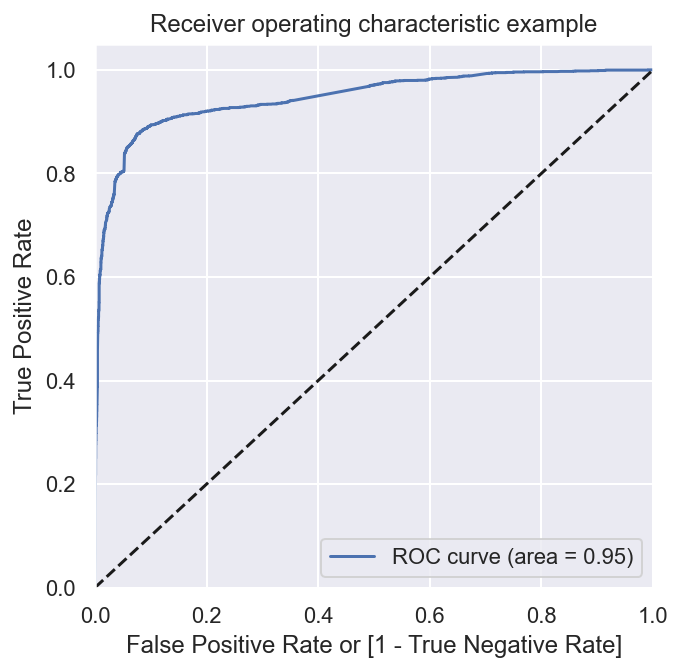

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

** Optimal Cut Off Point **

In [92]:
# Different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193675,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.034206,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000618,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.936426,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.249650,7987,0,1,1,1,0,0,0,0,0,0,0


In [93]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.684932,0.969747,0.506530
0.2,0.2,0.868052,0.913328,0.839693
0.3,0.3,0.893245,0.895339,0.891933
0.4,0.4,0.903952,0.880621,0.918566
0.5,0.5,0.905054,0.859771,0.933419
0.6,0.6,0.895292,0.799264,0.955442
0.7,0.7,0.881593,0.737531,0.971831
0.8,0.8,0.868840,0.684383,0.984379
0.9,0.9,0.841600,0.602208,0.991549


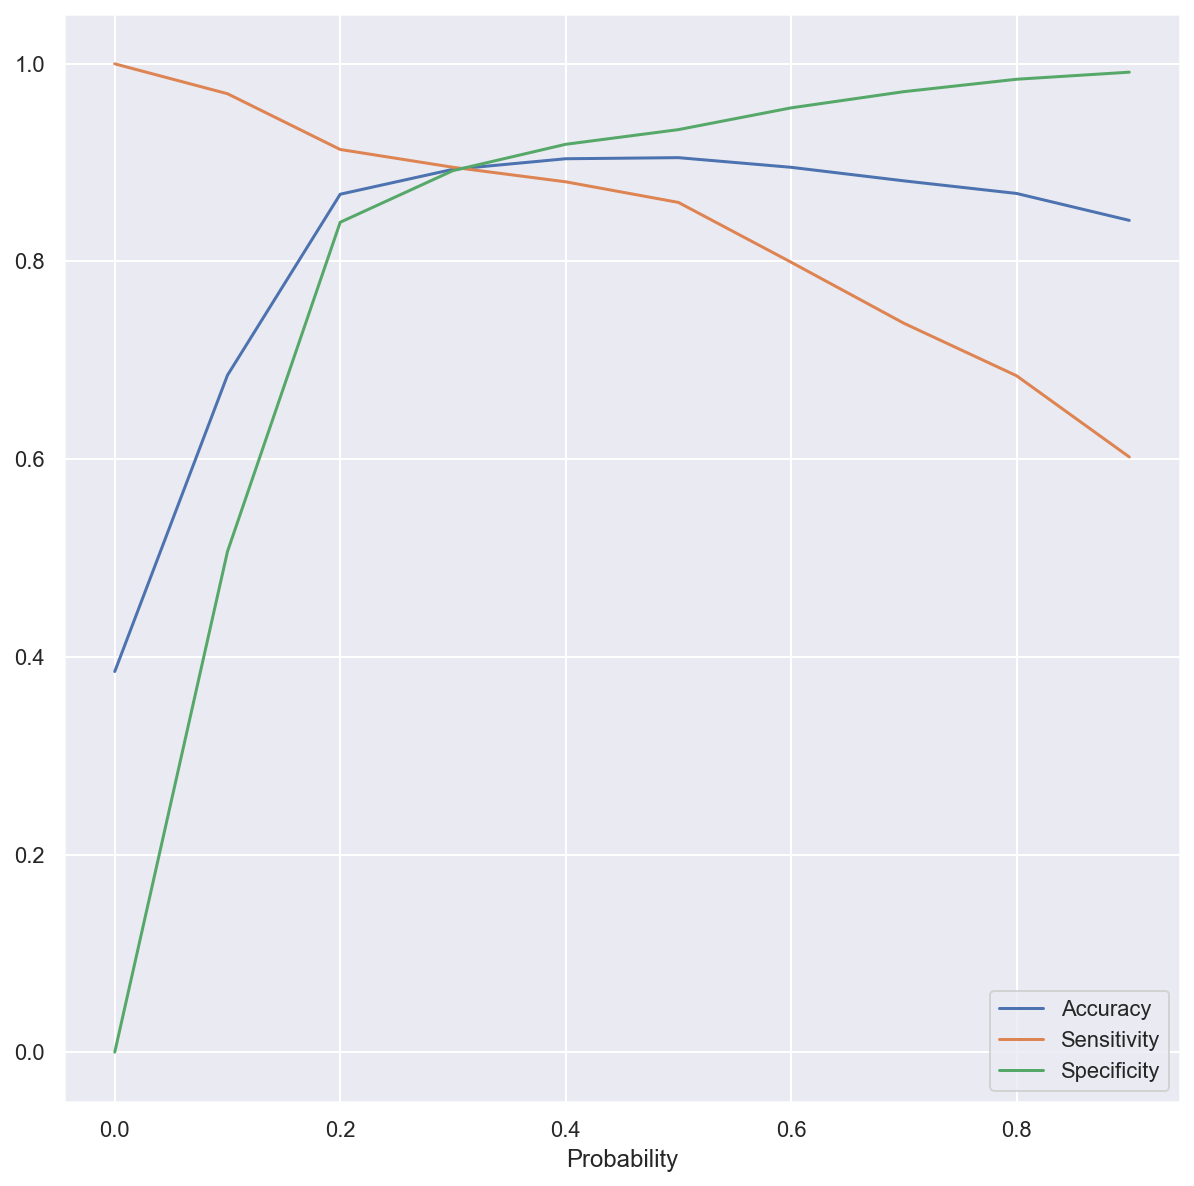

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize =(10,10))
plt.show()

In [95]:
### We can clearly see that 0.35 comes out to be an optimal cut off point in this case

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.193675,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.034206,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000618,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.936426,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.249650,7987,0,1,1,1,0,0,0,0,0,0,0,0


`As we know that probability 0.3, let's use that for our analysis. `

In [96]:
#Lets see the probability as 0.35

y_train_pred_final = model_accuracy_and_metrics(result, X_train_sm, 0.35)


---------------------------------------------------------------------
Predicted values on the train set - y_train_pred : -

3009    0.193675
1012    0.034206
9226    0.000618
4750    0.936426
7987    0.249650
dtype: float64

---------------------------------------------------------------------
Predicted values on the train set after reshaping - y_train_pred : -

[1.93675091e-01 3.42060353e-02 6.17873932e-04 9.36426244e-01
 2.49650426e-01]

---------------------------------------------------------------------
Column created as converted and converted probability : -

   Converted  Converted_prob  Prospect ID
0          0        0.193675         3009
1          0        0.034206         1012
2          0        0.000618         9226
3          1        0.936426         4750
4          1        0.249650         7987

---------------------------------------------------------------------
Creating a column predicted will be 1 if prob is > than 0.35 : -

   Converted  Converted_prob  Prospec

#### 3.3.5 Assigning Lead Score

Now we need to assign the predicted values.

In [97]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,Lead Score
0,0,0.193675,3009,0,19
1,0,0.034206,1012,0,3
2,0,0.000618,9226,0,0
3,1,0.936426,4750,1,94
4,1,0.249650,7987,0,25


In [98]:
#Precision Score 
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.8570864587445717

In [99]:
#Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8875715453802125

##### Precision and Recall Tradeoff

In [100]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

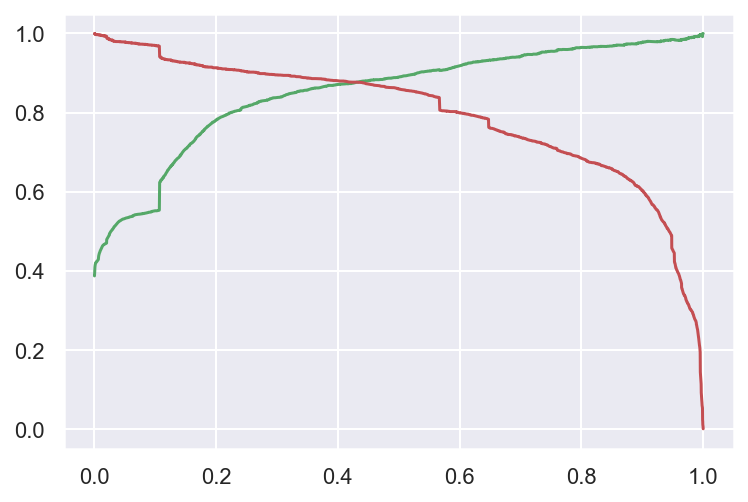

In [102]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 3.4 Prediction using the Model on the Test Set

In [103]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])



In [104]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.4,0.069102,0.666667,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,0.5,0.665933,0.833333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,0.2,0.032570,0.333333,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4216,0.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0.8,0.072183,1.000000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0.069102,0,0,0,0,0,0,1,0,1,0,0
1490,0.665933,0,0,0,0,0,0,1,0,0,0,0
7936,0.032570,0,0,0,0,0,0,1,0,1,0,0
4216,0.000000,1,0,0,0,1,0,0,0,0,0,0
3830,0.072183,0,0,0,0,0,0,1,0,1,0,0


In [106]:
#Add Constant
X_test_sm = sm.add_constant(X_test)

In [107]:
#Make Predictions
y_test_pred = result.predict(X_test_sm)


In [108]:
y_test_pred[:10]

3271    0.135519
1490    0.961170
7936    0.119654
4216    0.998856
3830    0.136935
1800    0.676663
6507    0.008363
4821    0.001120
4223    0.995032
4714    0.106888
dtype: float64

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Let's see the head
y_pred_1.head()

,0
3271,0.135519
1490,0.961170
7936,0.119654
4216,0.998856
3830,0.136935


In [111]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [112]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.135519
1,1,1490,0.961170
2,0,7936,0.119654
3,1,4216,0.998856
4,0,3830,0.136935


In [116]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.135519
1,1,1490,0.961170
2,0,7936,0.119654
3,1,4216,0.998856
4,0,3830,0.136935


In [118]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [119]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.135519,0
1,1,1490,0.961170,1
2,0,7936,0.119654,0
3,1,4216,0.998856,1
4,0,3830,0.136935,0


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8865222181417555

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1562,  172],
       [ 137,  852]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8614762386248737

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.9008073817762399

## 4. Conclusion




As we can see now, overall accuracy for the model is around 88%. 